1. Importing all the libraries which are required for running the codes. It helps us to refer to the code, i.e., . functions/objects that are written in another file.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/Users/avinashsaraswat/Downloads/Upgrad_case_study/loan.csv", dtype='object')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


For identifying total no. of columns and total no. of rows in a dataframe we use below code to find the shape of the dataframe uploaded.

In [3]:
print(data.shape)

(39717, 111)


List of Columns & NA counts where NA values are more than 40%:
As we can see there are 39717 rows & 111 columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So let's find out all columns where missing values are more than 40% percentage. We will remove those columns as it is not feasable to impute missing values for those columns.

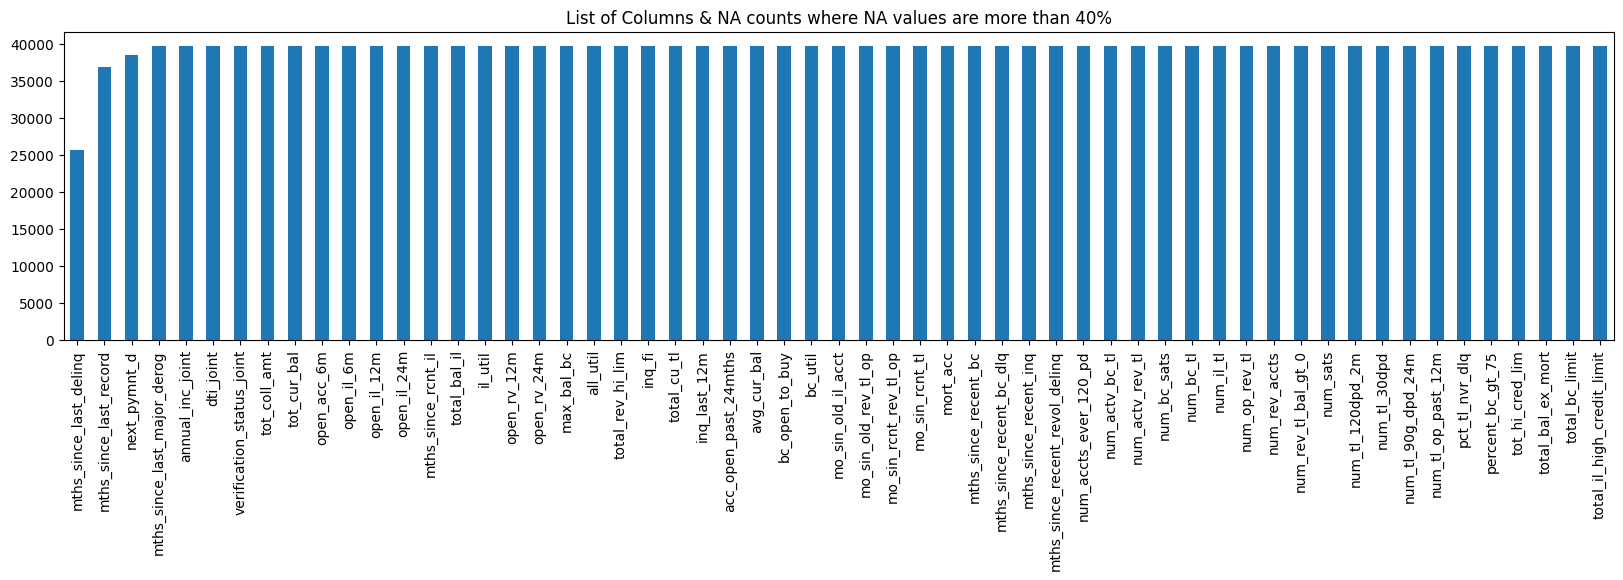

In [4]:
col_NA = data.isnull().sum()
col_NA = col_NA[col_NA.values >(0.4*len(data))]
plt.figure(figsize=(20,4))
col_NA.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 40%')
plt.show()

Data Cleaning and Manipulation:
Defining the functions for removing the columns and rows which has 40% or more missing values. We use function as it makes our code more readable and reusable.

In [5]:
def removeNulls(dataframe, axis =1, percent=0.4):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

Remove columns where NA values are more than or equal to 40%

In [6]:
data = removeNulls(data, axis =1,percent = 0.4)

Number of Columns dropped	:  57

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 54)


Remove rows where NA values are more than or equal to 40%

In [7]:
data = removeNulls(data, axis =0,percent = 0.4)


Number of Rows dropped	:  0

Old dataset rows,columns (39717, 54) 
New dataset rows,columns (39717, 54)


Remove columns where number of unique value is only 1.
We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [8]:
unique = data.nunique()
unique = unique[unique.values == 1]

In [9]:
data.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

So now we are left with (39717, 45) rows & columns.


Employment Term : Remove 'n/a' value with 'self-employed'.
There are some values in emp_term which are 'n/a', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [10]:
print(data.emp_length.unique())
data.emp_length.fillna('0',inplace=True)
data.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(data.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


Remove irrelevant columns.
Till now we have removed the columns based on the count & statistics. Now let's look at each column from business perspective if that is required or not for our analysis such as Unique ID's, URL, zip_code.

In [11]:
not_required_columns = ["id","member_id","url","zip_code"]
data.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

So now we are left with (39717, 41) rows & columns.


Converting the string values in int_rate in float so as to have numerical values in all the dataframe.

In [12]:
data['int_rate'] = data['int_rate'].replace("%","", regex=True).astype(float)

Cast all continuos variables to numeric
Cast all continuos variables to numeric so that we can find a correlation between them.

In [13]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

In [14]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0,0,0,May-16,1313.76,May-16,0
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,3939.14,3000,939.14,0,0,0,Jan-15,111.34,Dec-14,0
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,646.02,162.02,294.94,0,189.06,2.09,Apr-12,152.39,Aug-12,0
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,1469.34,673.48,533.42,0,269.29,2.52,Nov-12,121.45,Mar-13,0


In [15]:
data.shape

(39717, 41)

In [16]:
(data.purpose.value_counts()*100)/len(data)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Purpose of loan : Drop records where values are less than 0.75
We will analyse only those categories which contain more than 0.75 of records.

In [17]:
del_loan_purpose = (data.purpose.value_counts()*100)/len(data)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

data.drop(labels = data[data.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

print(data.purpose.unique())

So now we are left with (35621, 41) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


In [18]:
(data.loan_status.value_counts()*100)/len(data)

Fully Paid     83.195306
Charged Off    13.966480
Current         2.838213
Name: loan_status, dtype: float64

Loan Status : Drop records where values are less than 1.5%
As we can see, Other than ['Current','Fully Paid' & Charged off] other loan_status are not relevent for our analysis.

In [19]:
del_loan_status = (data.loan_status.value_counts()*100)/len(data)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

data.drop(labels = data[data.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

print(data.loan_status.unique())

So now we are left with (35621, 41) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


In [20]:
data['loan_income_ratio']= data['loan_amnt']/data['annual_inc']

In [21]:
data['issue_month'],data['issue_year'] = data['issue_d'].str.split('-', 1).str
data[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [22]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
data['issue_month'] = pd.Categorical(data['issue_month'],categories=months_order, ordered=True)

Create Bins for range of Loan Amount

In [23]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
data['loan_amnt_range'] = pd.cut(data['loan_amnt'], bins, labels=slot)

Create Bins for range of Annual Income

In [24]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
data['annual_inc_range'] = pd.cut(data['annual_inc'], bins, labels=slot)

Create Bins for range of Interest rates

In [25]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
data['int_rate_range'] = pd.cut(data['int_rate'], bins, labels=slot)

Continuous Variables
In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

Categorical Variables
For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

'''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''

In [26]:
def univariate(df,col,vartype,hue =None):
    
    
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

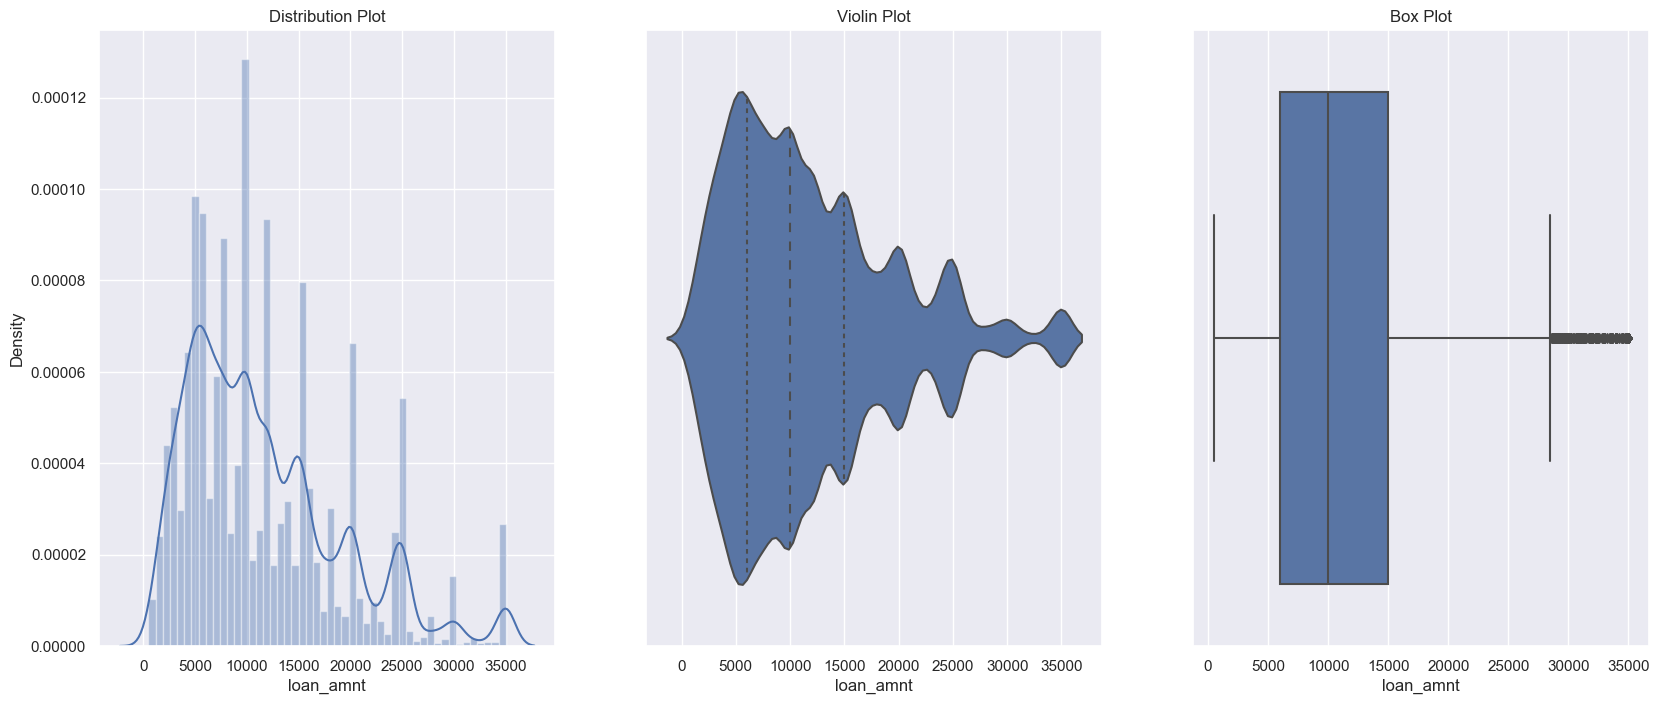

In [27]:
univariate(df=data,col='loan_amnt',vartype=0)

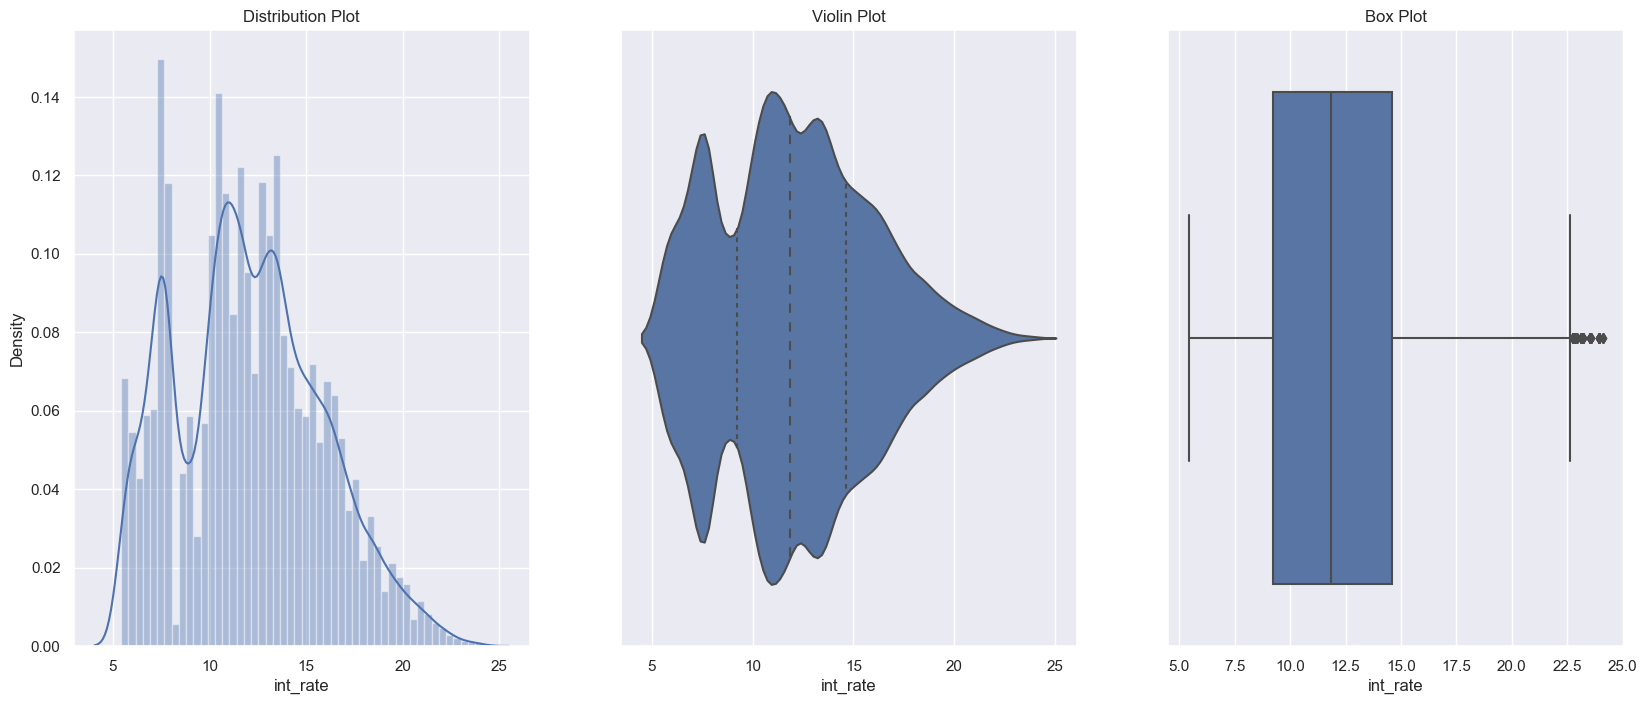

In [28]:
univariate(df=data,col='int_rate',vartype=0)

In [32]:
data["annual_inc"].describe()

count    3.562100e+04
mean     6.959688e+04
std      6.500998e+04
min      4.000000e+03
25%      4.160000e+04
50%      6.000000e+04
75%      8.300400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

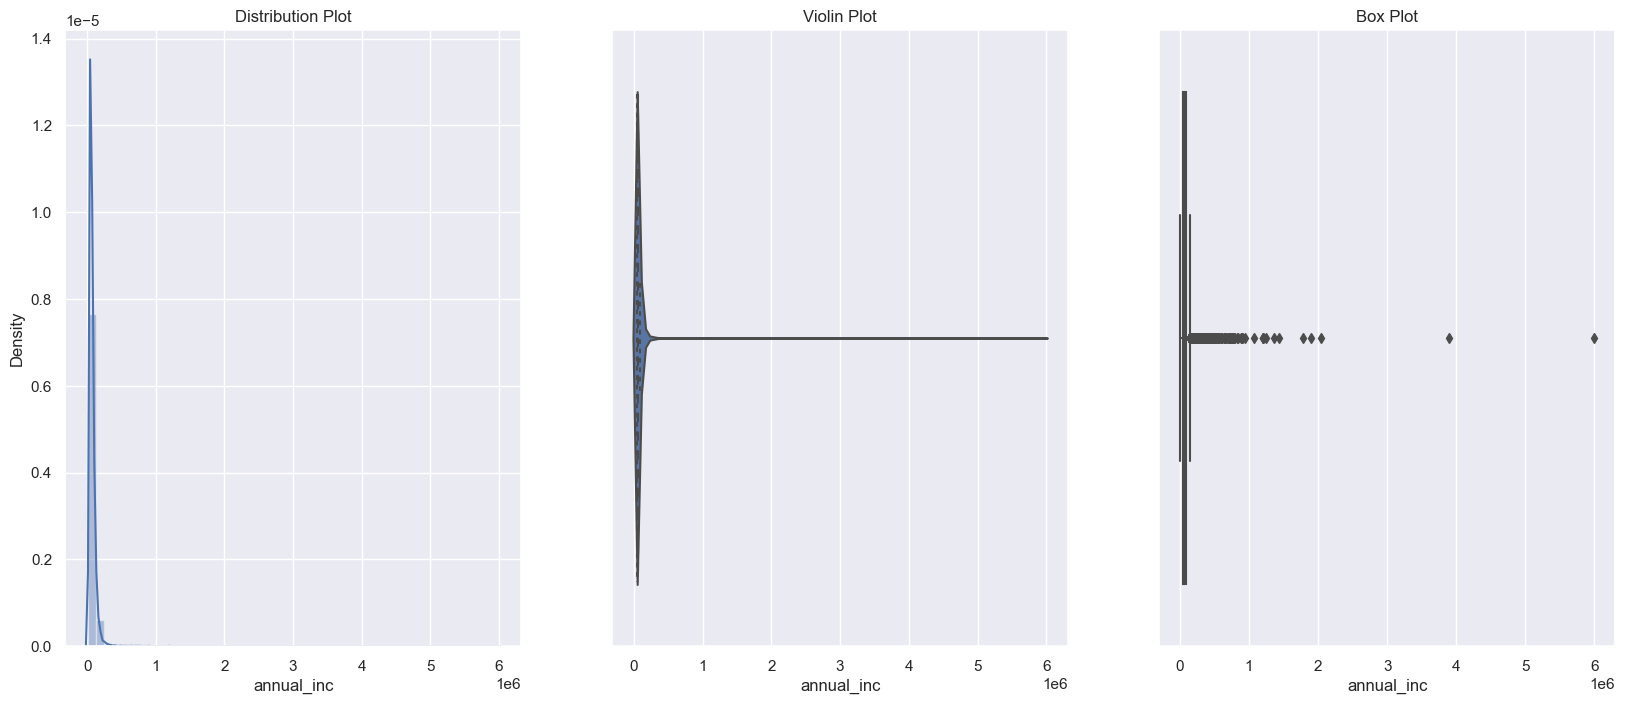

In [31]:
univariate(df=data,col='annual_inc',vartype=0)

Max value is 6000000 which is approx 100 times more than mean value, so we will remove the outliers from Annual Income.
Remove Outliers (values from 99 to 100%)

In [33]:
q = data["annual_inc"].quantile(0.95)
data = data[data["annual_inc"] < q]
data["annual_inc"].describe()

count     33833.000000
mean      61636.972013
std       27786.221783
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78096.000000
max      142500.000000
Name: annual_inc, dtype: float64

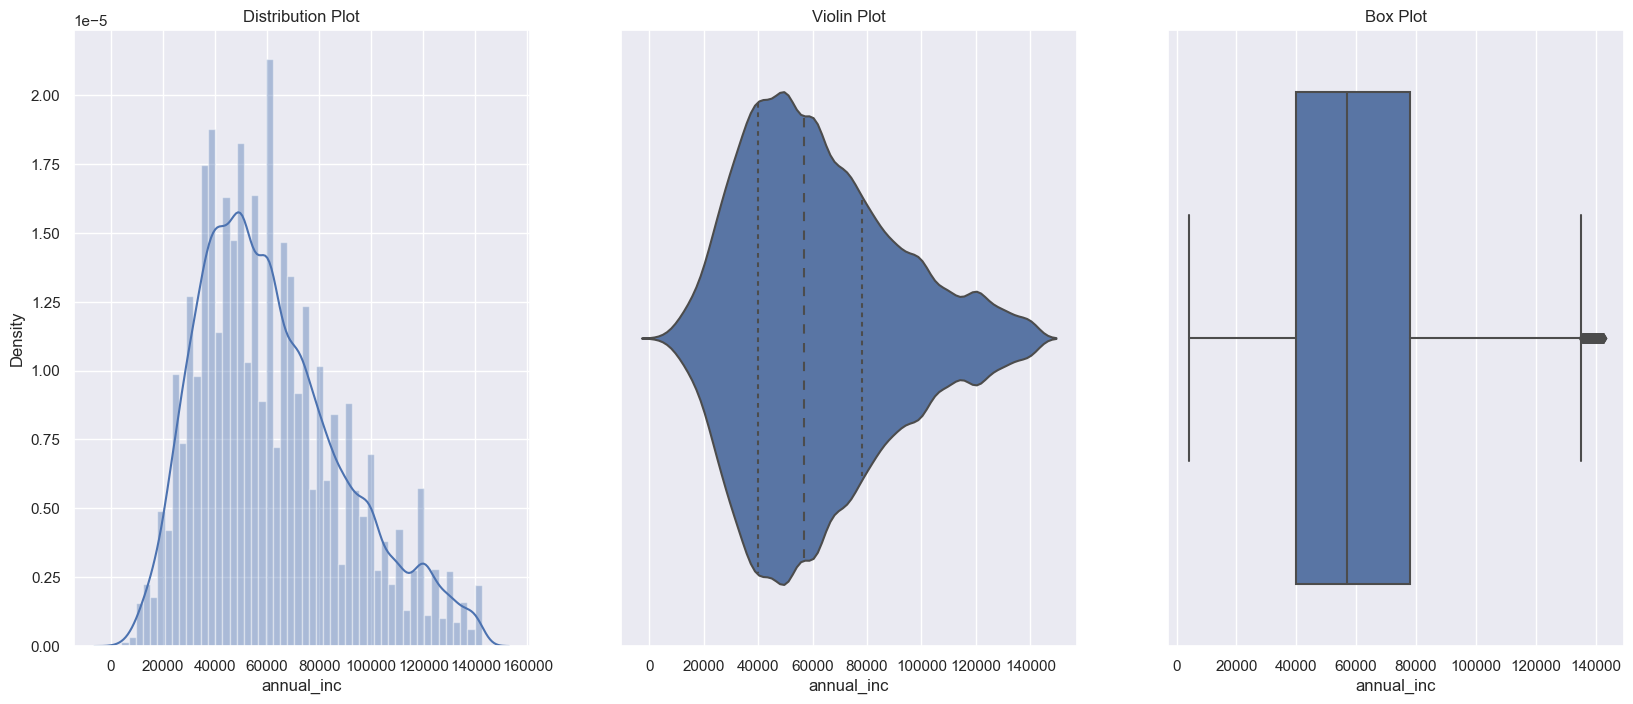

In [34]:
univariate(df=data,col='annual_inc',vartype=0)

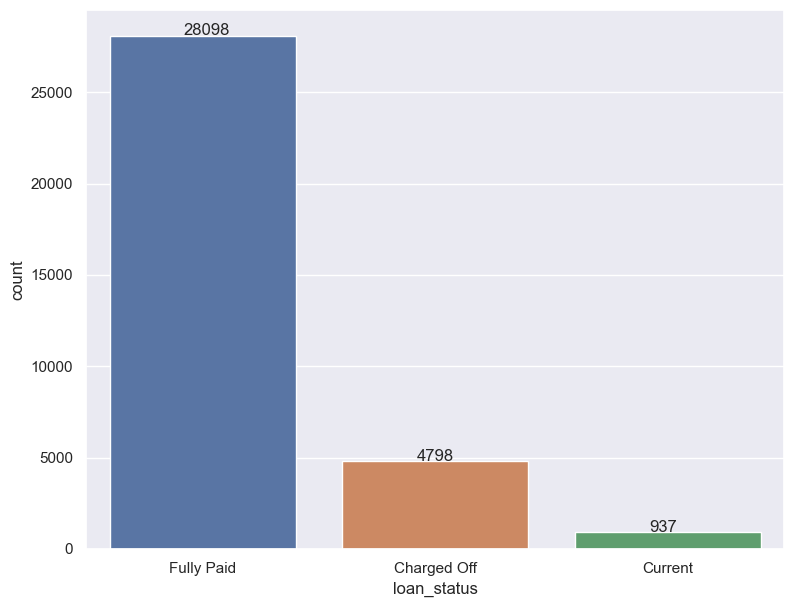

In [35]:
univariate(df=data,col='loan_status',vartype=1)

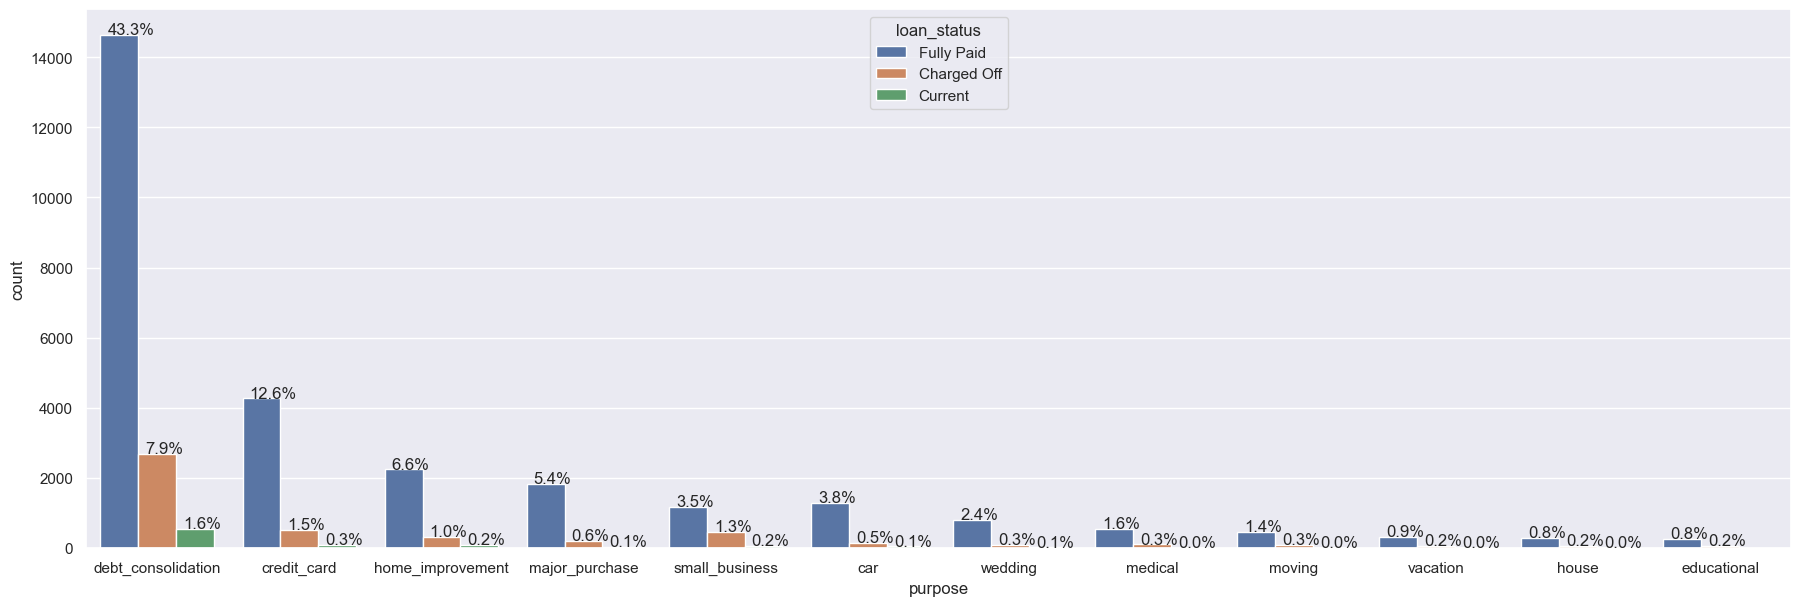

In [36]:
univariate(df=data,col='purpose',vartype=1,hue='loan_status')

In [37]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [38]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
data.drop(data[data['home_ownership'].isin(rem)].index,inplace=True)
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

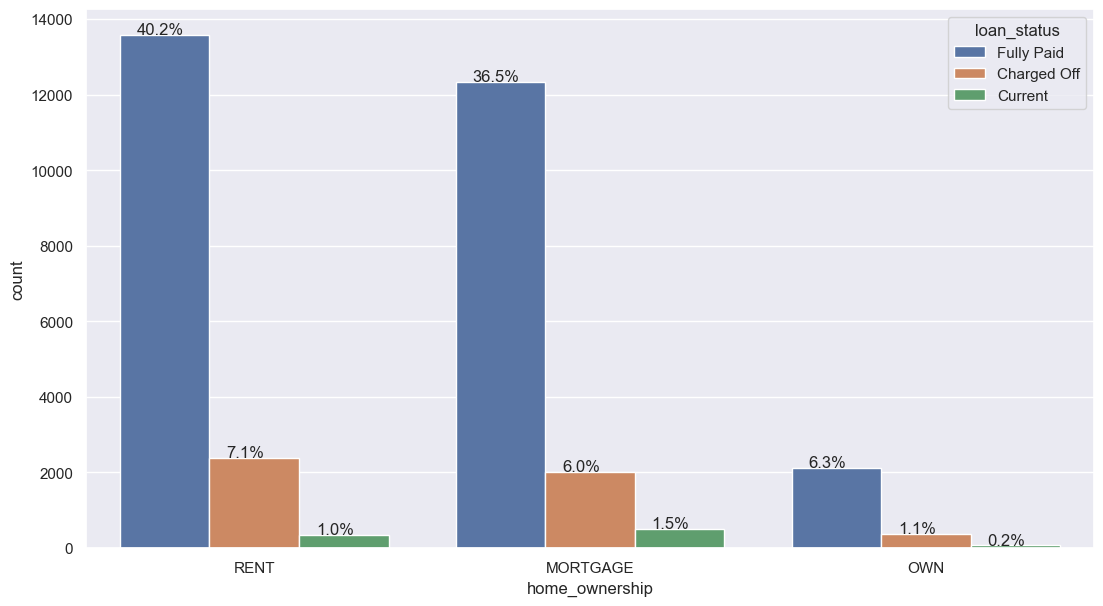

In [39]:
univariate(df=data,col='home_ownership',vartype=1,hue='loan_status')

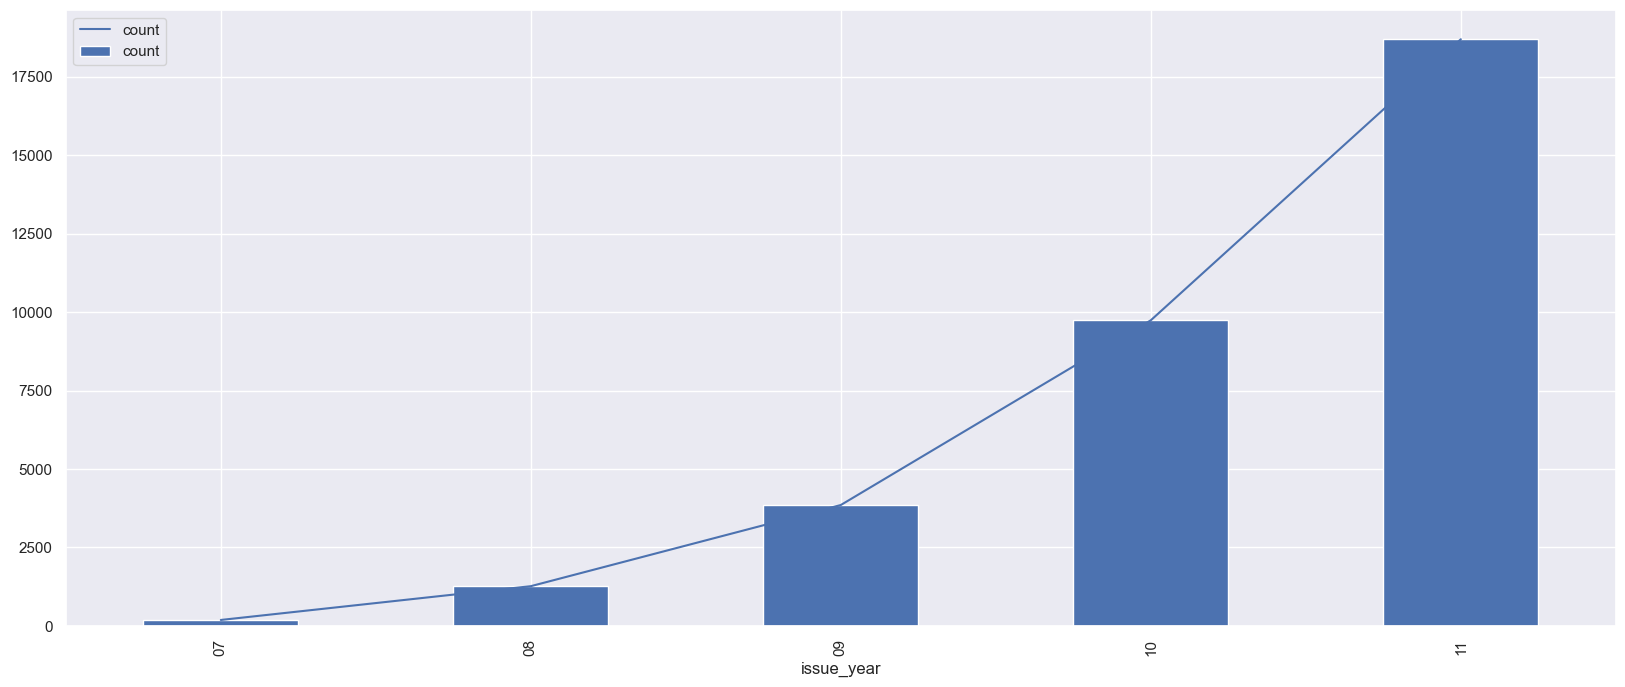

In [40]:
year_wise =data.groupby(by= [data.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

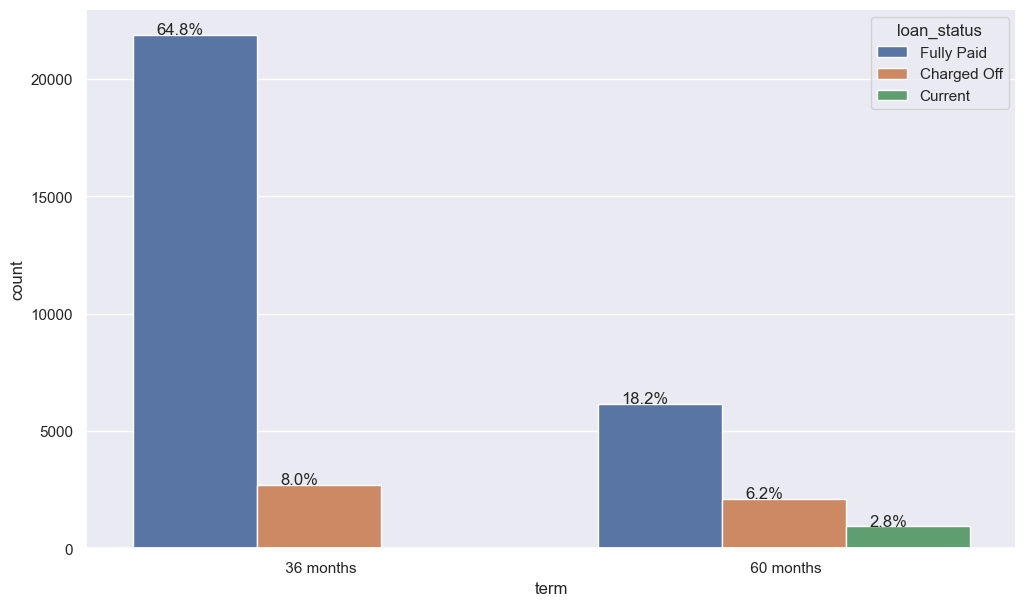

In [41]:
univariate(df=data,col='term',vartype=1,hue='loan_status')

Bivariate/Multivariate Analysis finds out the relationship between two or more than two variables. We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

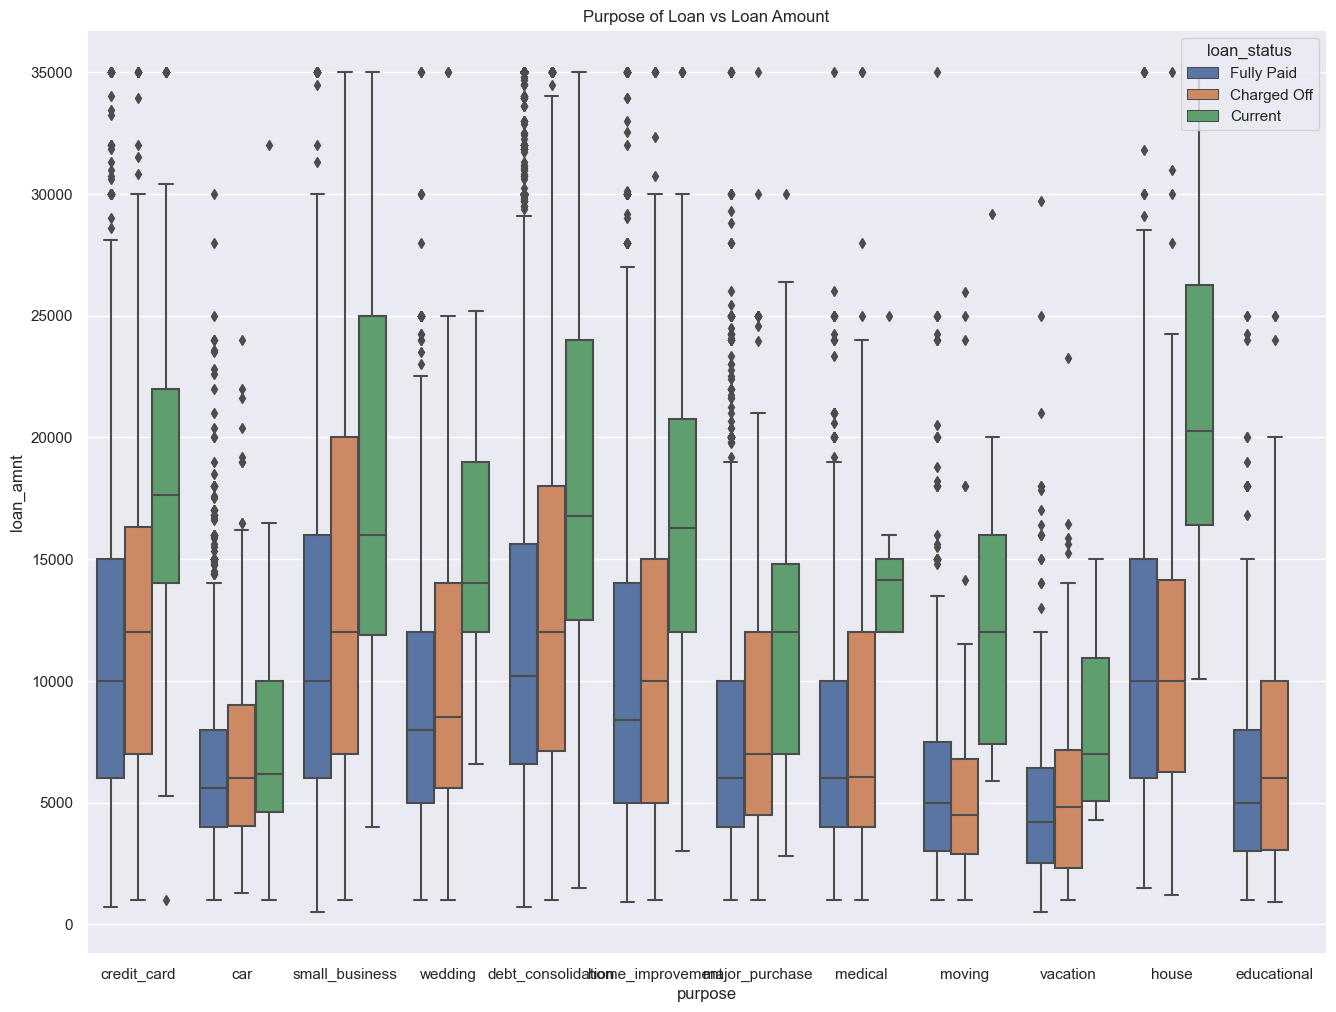

In [42]:
plt.figure(figsize=(16,12))
sns.boxplot(data =data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

Correlation Matrix : All Continuos(Numeric) Variables

In [43]:
data_correlation = data.corr()
data_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
loan_amnt,1.000000,0.981185,0.938815,0.311216,0.926630,0.403703,0.098973,0.672369
funded_amnt,0.981185,1.000000,0.957213,0.315950,0.953258,0.398952,0.098277,0.659560
funded_amnt_inv,0.938815,0.957213,1.000000,0.309164,0.900446,0.383291,0.104181,0.627569
int_rate,0.311216,0.315950,0.309164,1.000000,0.285141,0.066757,0.114701,0.233662
installment,0.926630,0.953258,0.900446,0.285141,1.000000,0.399428,0.085298,0.608330
annual_inc,0.403703,0.398952,0.383291,0.066757,0.399428,1.000000,-0.081678,-0.291633
dti,0.098973,0.098277,0.104181,0.114701,0.085298,-0.081678,1.000000,0.142499
loan_income_ratio,0.672369,0.659560,0.627569,0.233662,0.608330,-0.291633,0.142499,1.000000


HeatMap: All continuous variables

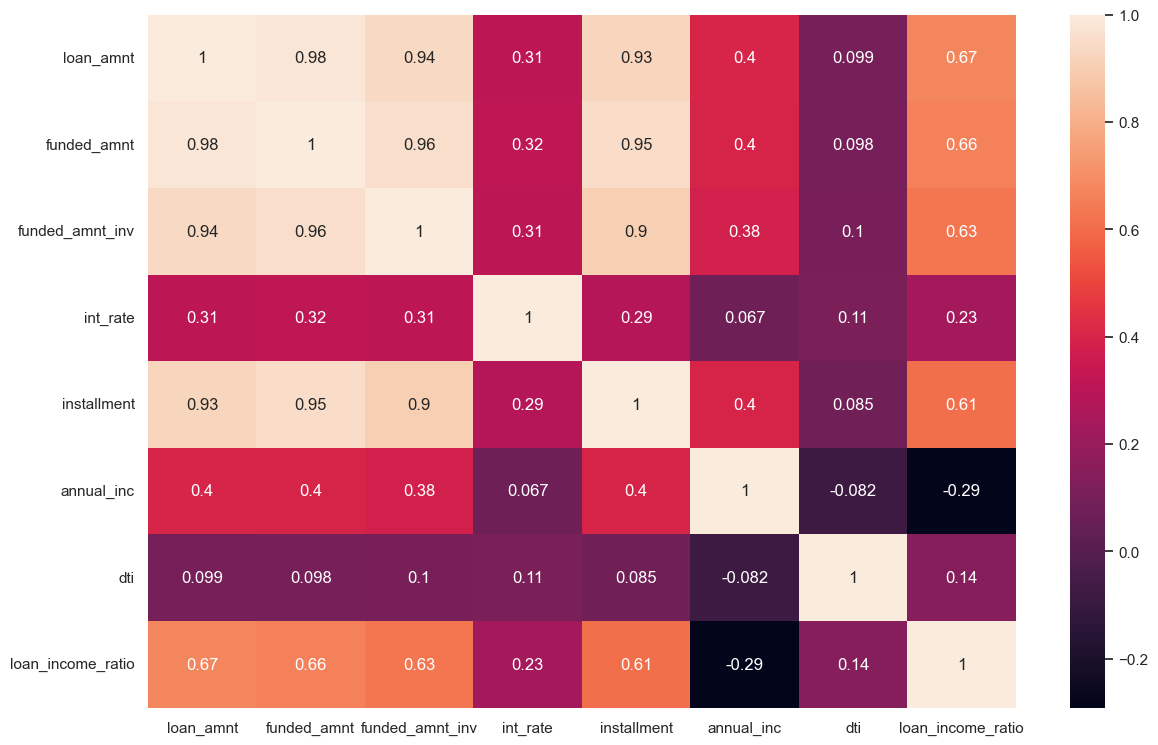

In [44]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(data_correlation, 
            xticklabels=data_correlation.columns.values,
            yticklabels=data_correlation.columns.values,annot= True)
plt.show()

In [45]:
loanstatus=data.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=data.loc[data['loan_status']=='Charged Off']

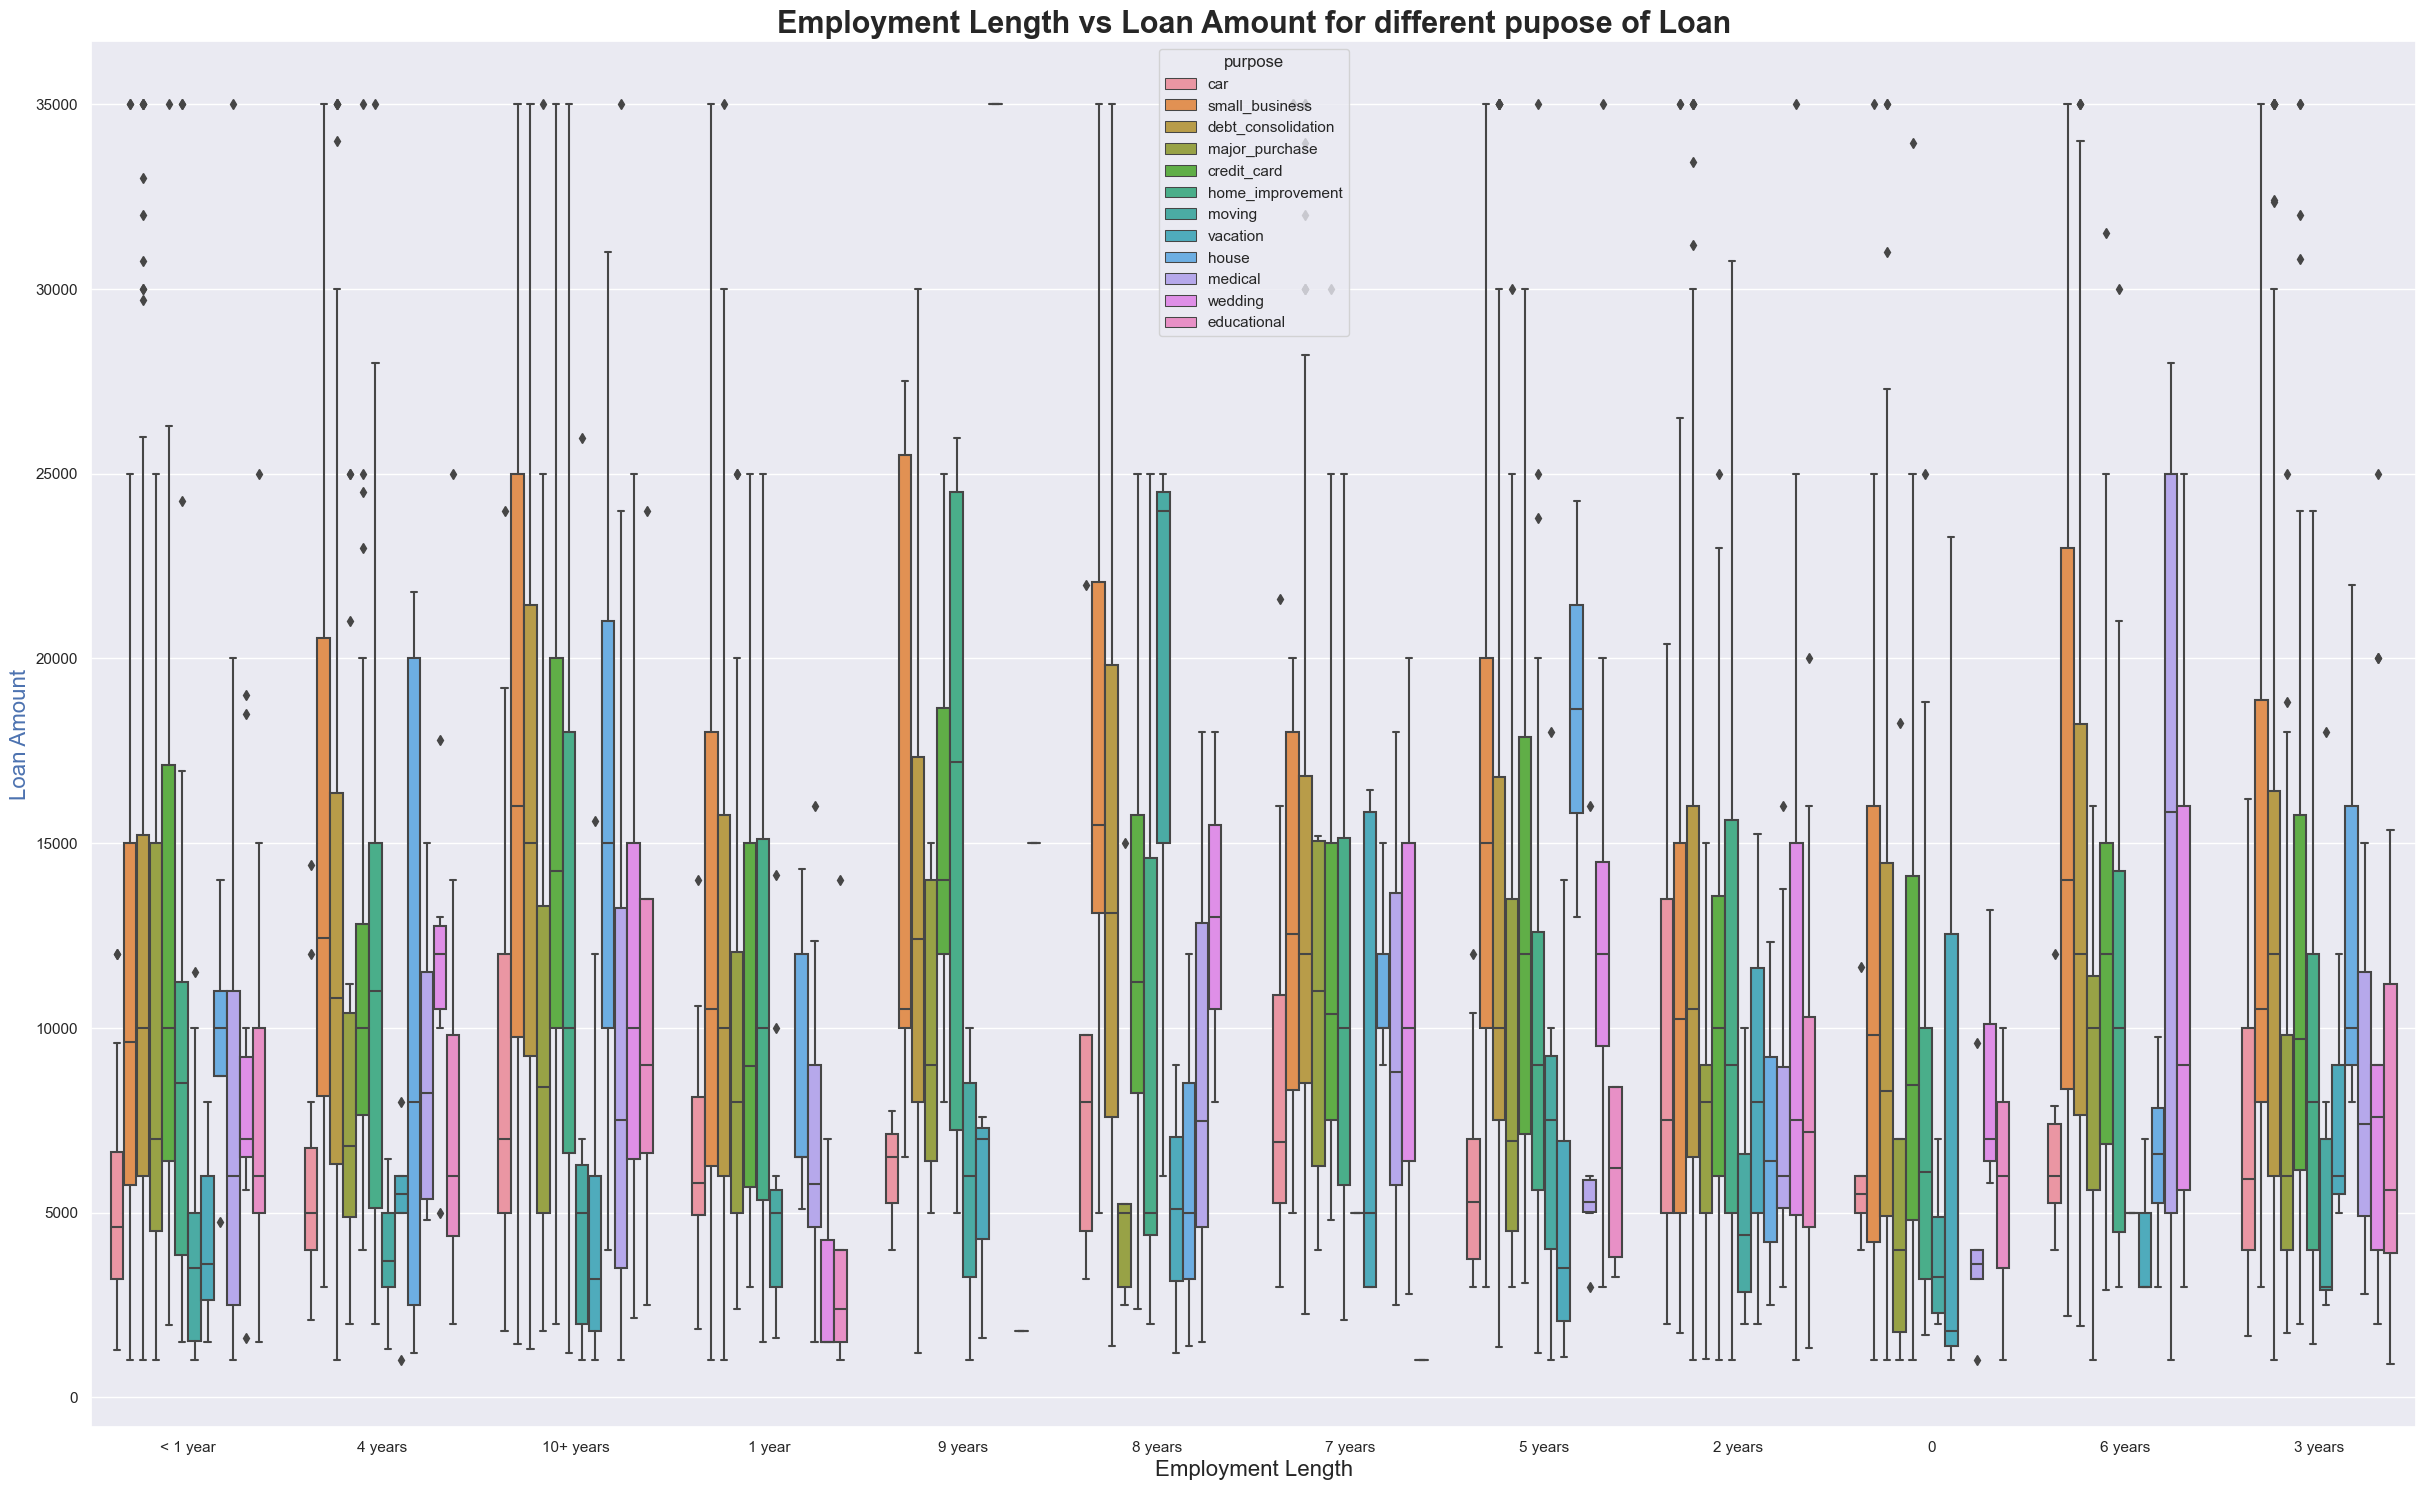

In [46]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()